In [1]:
import pandas as pd
import requests

url = "https://uk.wikipedia.org/wiki/Населення_України"
response = requests.get(url)
response.encoding = "utf-8" 

df = pd.read_html(response.text, match="Коефіцієнт народжуваності")[0]
df.head()

C:\Users\renat\AppData\Local\Temp\ipykernel_48204\1710882352.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(response.text, match="Коефіцієнт народжуваності")[0]


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [2]:
df.shape # structure (rows, columns)

(28, 9)

In [3]:
import numpy as np
df.replace('—', np.nan, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [4]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [5]:
for col in df.columns:
    if col != "Регіон" and df[col].dtype == object: 
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

print(df.dtypes)        

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [6]:
for column in df.columns:
    nan_values = df[column].isnull().sum()
    if nan_values > 0:
        print(f'{column}: {nan_values}')

1950: 2
1960: 1
1970: 1
2014: 2
2019: 4


In [7]:
df.drop([27], inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


In [8]:
df_new = df.fillna(df.drop(columns=['Регіон']).mean().round(2), inplace=False)
df_new

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.00,160.0,130,73,126,111.44,80.17
1,Вінницька,224.00,192.00,142.0,124,84,112,109.00,76.00
2,Волинська,247.00,250.00,179.0,153,112,148,141.00,101.00
3,Дніпропетровська,204.00,204.00,151.0,123,71,112,111.00,71.00
4,Донецька,271.00,214.00,140.0,109,61,98,82.00,80.17
5,Житомирська,261.00,223.00,159.0,129,89,122,120.00,79.00
6,Закарпатська,314.00,273.00,207.0,168,115,151,146.00,104.00
7,Запорізька,219.00,197.00,150.0,124,71,106,106.00,68.00
8,Івано-Франківська,243.00,248.00,182.0,155,103,124,122.00,88.00
9,Київська,204.00,189.00,156.0,123,73,122,121.00,80.00


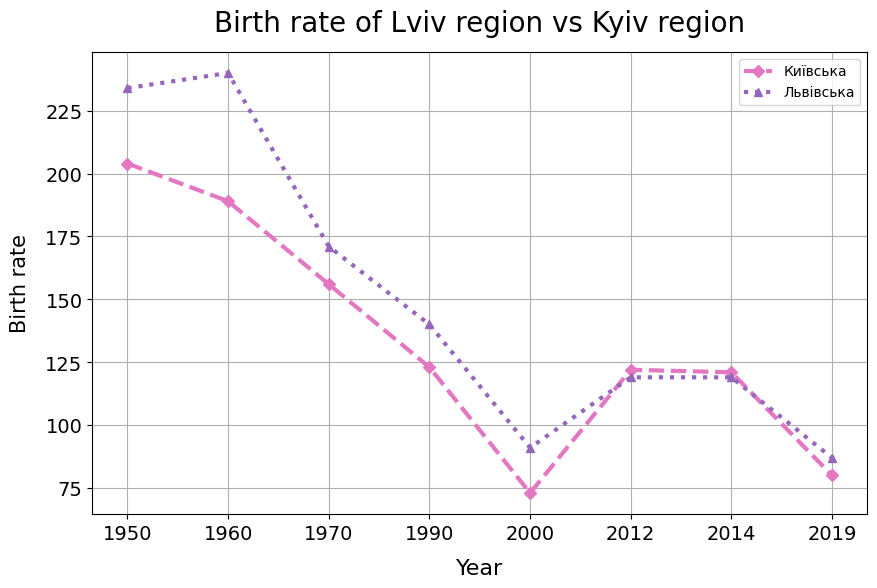

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

regions = ['Київська', 'Львівська']

df_regions = df_new[df_new['Регіон'].isin(regions)].melt(id_vars=['Регіон'], 
                                                       value_vars=['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019'],  # Specified years
                                                       var_name='Year', 
                                                       value_name='Birth Rate')

plt.figure(figsize=(10, 6))

plt.plot(
    df_regions[df_regions['Регіон'] == 'Київська']['Year'], 
    df_regions[df_regions['Регіон'] == 'Київська']['Birth Rate'],
    label="Київська",
    linestyle="--",
    color="#E377C2",
    linewidth=3,
    marker="D",
)

plt.plot(
    df_regions[df_regions['Регіон'] == 'Львівська']['Year'], 
    df_regions[df_regions['Регіон'] == 'Львівська']['Birth Rate'],
    label="Львівська",
    linestyle=":",
    color="#9467BD",
    linewidth=3,
    marker="^",
)

plt.xlabel("Year", fontsize=16, labelpad=11)
plt.ylabel("Birth rate", fontsize=15, labelpad=11)
plt.title("Birth rate of Lviv region vs Kyiv region", fontsize=20, pad=15)
plt.legend()
plt.grid()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [9]:
df_average_2019 = df_new['2019'].mean().round(2)
df_average_2019

np.float64(80.17)

In [10]:
for index, row in df_new.iterrows():
    if row['2019'] > df_new['2019'].mean().round(2):
        print(f'{row['Регіон']}')

Волинська
Закарпатська
Івано-Франківська
Львівська
Одеська
Рівненська
Херсонська
Чернівецька
Київ


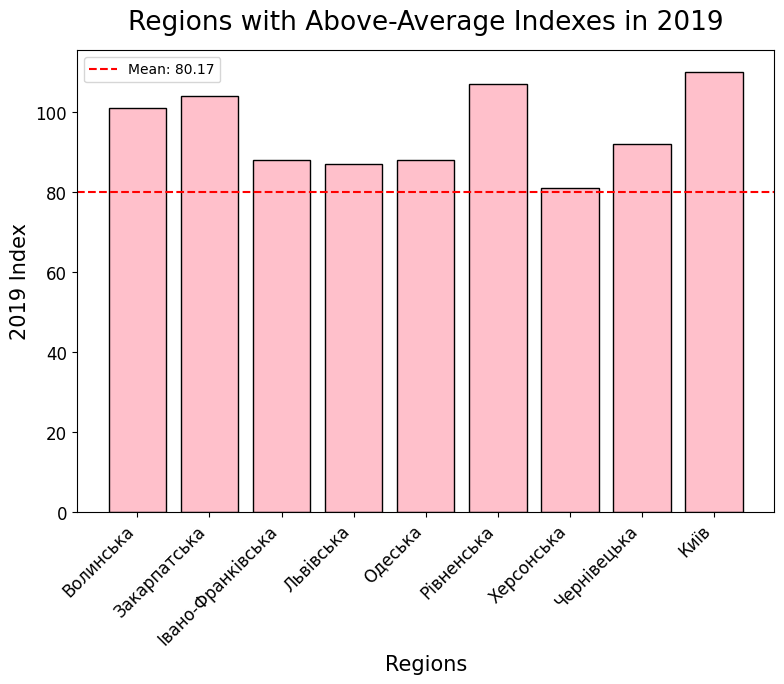

In [71]:
import matplotlib.pyplot as plt

df_average_2019 = df_new['2019'].mean().round(2)
filtered_df = df_new[df_new['2019'] > df_average_2019]  

plt.figure(figsize=(9, 6))
plt.bar(filtered_df['Регіон'], filtered_df['2019'], color='pink', edgecolor='black')

plt.axhline(df_average_2019, color='red', linestyle='dashed', label=f'Mean: {df_average_2019}') 
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.ylabel('2019 Index',fontsize=15)
plt.xlabel('Regions', fontsize=15)
plt.title('Regions with Above-Average Indexes in 2019',fontsize=19, pad=15)
plt.legend()

plt.show()

In [12]:
max_birth_rate =  df_new.loc[df_new['2014']==df_new['2014'].max(),'Регіон']
print(max_birth_rate)

16    Рівненська
Name: Регіон, dtype: object


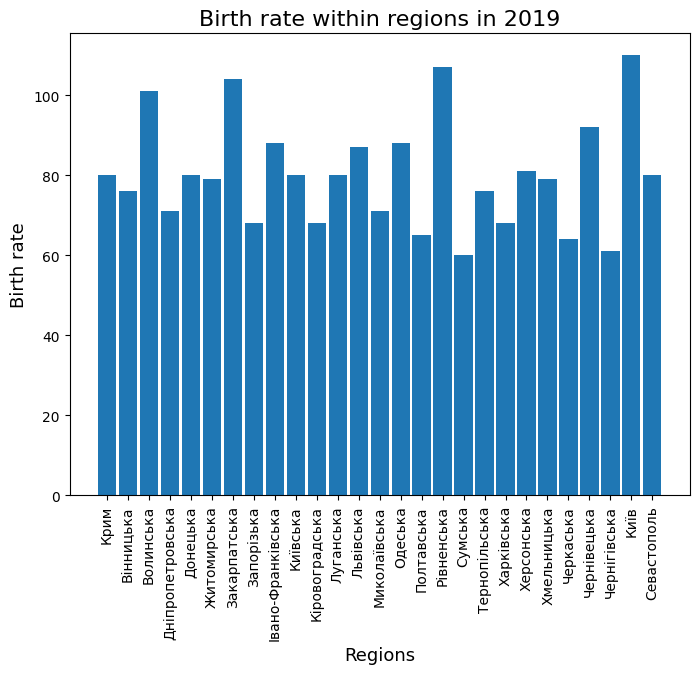

In [37]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.bar(df_new['Регіон'], df_new['2019'], width=0.87)
plt.xlabel('Regions', fontsize=13)
plt.ylabel('Birth rate', fontsize=13)
plt.title('Birth rate within regions in 2019', fontsize=16)
plt.xticks(rotation=90)

plt.show()
